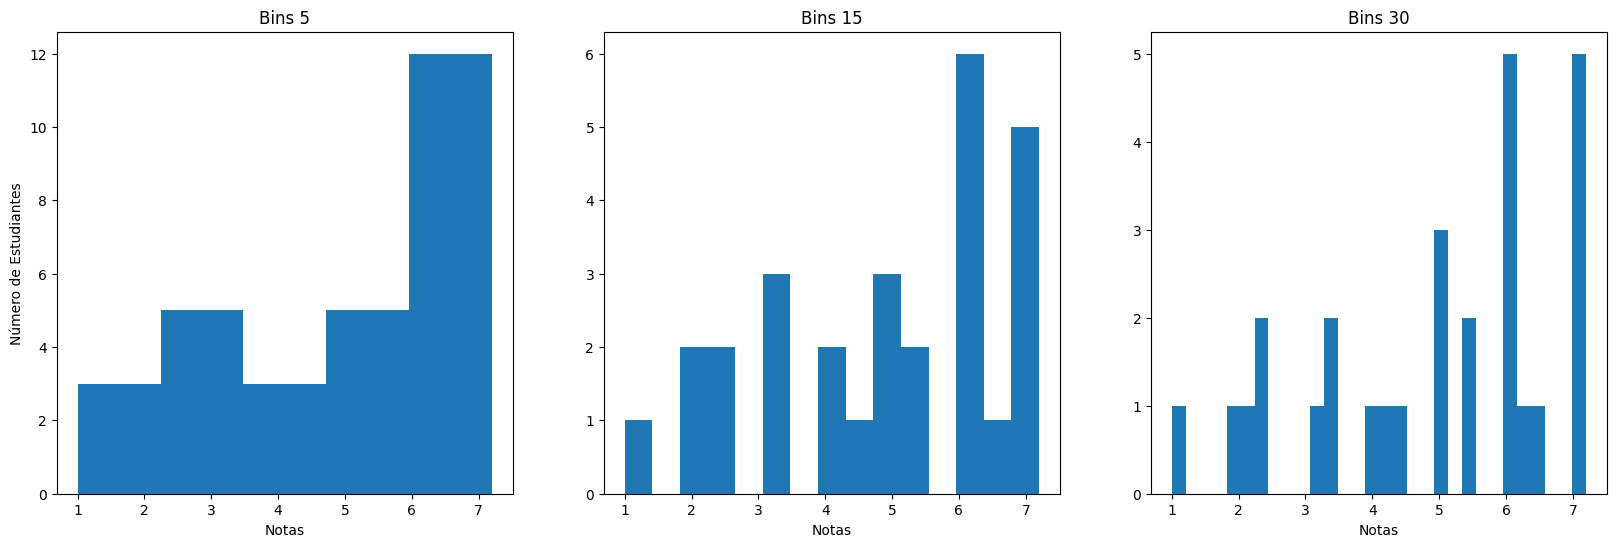

In [76]:
import matplotlib.pyplot as plt
import numpy as np

a = np.array([4.5, 4, 4.1, 1, 2.3, 2.2, 2.4, 5, 5.5, 6.2, 6, 6, 6, 6])
b = np.append(a, a + 1)

fig = plt.figure(figsize=(20, 6))
ax = fig.subplot_mosaic("ABC")
ax["A"].hist(b, bins=5)
ax["A"].set_title("Bins 5")
ax["A"].set_xlabel("Notas")
ax["A"].set_ylabel("Número de Estudiantes")
ax["B"].hist(b, bins=15)
ax["B"].set_title("Bins 15")
ax["B"].set_xlabel("Notas")
ax["C"].hist(b, bins=30)
ax["C"].set_title("Bins 30")
ax["C"].set_xlabel("Notas")
plt.show()

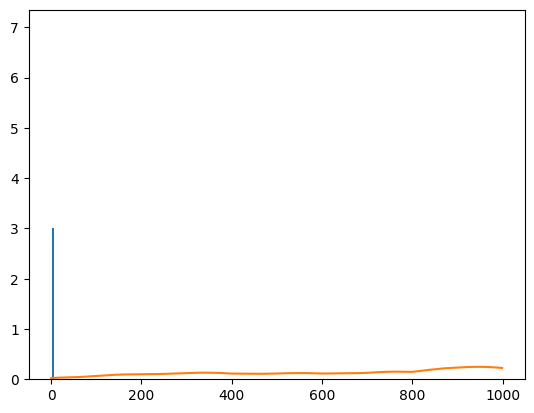

In [77]:
from sklearn.neighbors import KernelDensity


kd_gauss = KernelDensity(kernel="epanechnikov")
kd_gauss.fit(b[:, np.newaxis])
x_grid = np.linspace(1, 6, 1000)
b_gauss = np.exp(kd_gauss.score_samples(x_grid[:, np.newaxis]))
plt.hist(b)
plt.plot(b_gauss)

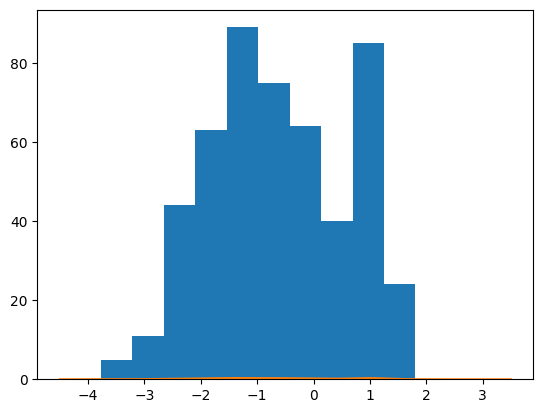

In [78]:
from scipy.stats import norm

np.random.seed(0)
x_grid = np.linspace(-4.5, 3.5, 1000)
x = np.concatenate([norm(-1, 1.0).rvs(400), norm(1, 0.3).rvs(100)])


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


pdf = kde_sklearn(x, x_grid, bandwidth=0.2)

plt.hist(x)
plt.plot(x_grid, pdf)

In [93]:
n = 100
np.random.seed(123)
muestra_1 = np.random.normal(loc=1, scale=0.5, size=int(n * 0.75))
muestra_2 = np.random.normal(loc=-1, scale=0.5, size=int(n * 0.25))
datos = np.hstack((muestra_1, muestra_2)) + 3

X_grid = np.linspace(0, 7, 200)

modelo_kde = KernelDensity(kernel="tophat", bandwidth=0.2)
modelo_kde.fit(datos.reshape(-1, 1))

log_densidad_pred = modelo_kde.score_samples(X_grid.reshape((-1, 1)))
# Se aplica el exponente para deshacer el logaritmo
densidad_pred_tophat = np.exp(log_densidad_pred)

In [94]:
n = 100
np.random.seed(123)
muestra_1 = np.random.normal(loc=1, scale=0.5, size=int(n * 0.75))
muestra_2 = np.random.normal(loc=-1, scale=0.5, size=int(n * 0.25))
datos = np.hstack((muestra_1, muestra_2)) + 3

X_grid = np.linspace(0, 7, 200)

modelo_kde = KernelDensity(kernel="gaussian", bandwidth=0.2)
modelo_kde.fit(datos.reshape(-1, 1))

log_densidad_pred = modelo_kde.score_samples(X_grid.reshape((-1, 1)))
# Se aplica el exponente para deshacer el logaritmo
densidad_pred_gaussian = np.exp(log_densidad_pred)

In [95]:
n = 100
np.random.seed(123)
muestra_1 = np.random.normal(loc=1, scale=0.5, size=int(n * 0.75))
muestra_2 = np.random.normal(loc=-1, scale=0.5, size=int(n * 0.25))
datos = np.hstack((muestra_1, muestra_2)) + 3

X_grid = np.linspace(0, 7, 200)

modelo_kde = KernelDensity(kernel="epanechnikov", bandwidth=0.2)
modelo_kde.fit(datos.reshape(-1, 1))

log_densidad_pred = modelo_kde.score_samples(X_grid.reshape((-1, 1)))
# Se aplica el exponente para deshacer el logaritmo
densidad_pred_epa = np.exp(log_densidad_pred)

Text(0.5, 1.0, 'Kernel Epanechnikov h=0.2')

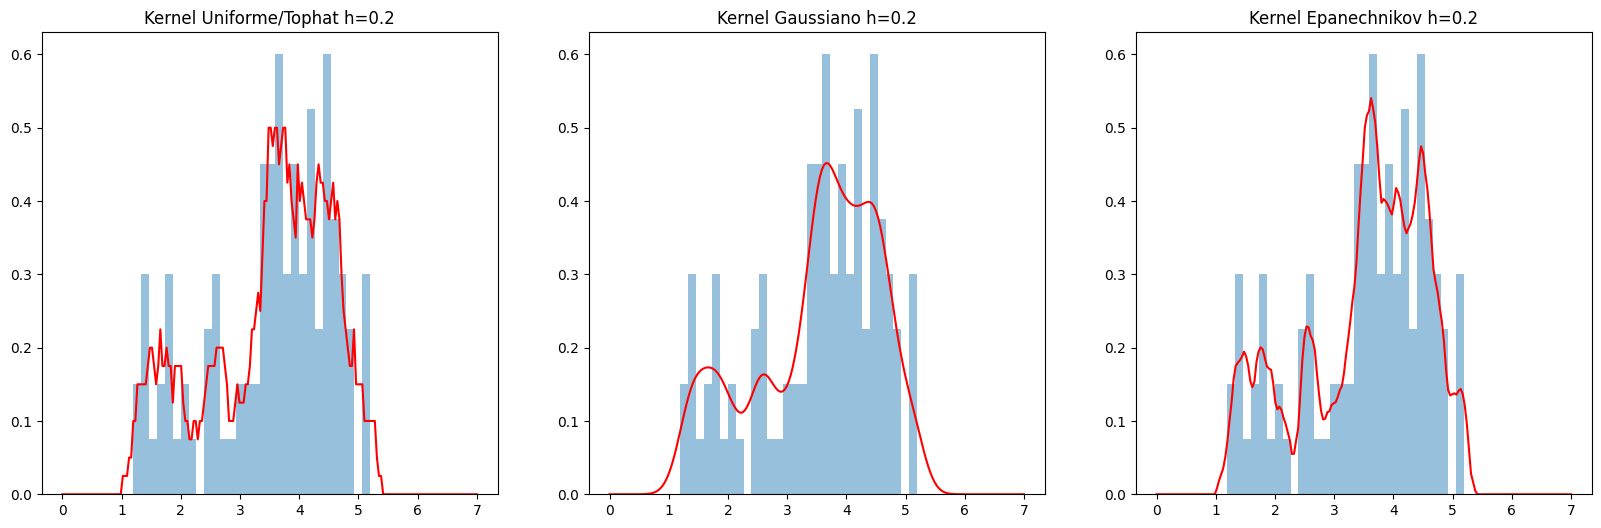

In [96]:
fig = plt.figure(figsize=(20, 6))
ax = fig.subplot_mosaic("ABC")
ax["A"].hist(datos, bins=30, density=True, color="#3182bd", alpha=0.5)
ax["A"].plot(X_grid, densidad_pred_tophat, color="red", label="predicción")
ax["A"].set_title("Kernel Uniforme/Tophat h=0.2")

ax["B"].hist(datos, bins=30, density=True, color="#3182bd", alpha=0.5)
ax["B"].plot(X_grid, densidad_pred_gaussian, color="red", label="predicción")
ax["B"].set_title("Kernel Gaussiano h=0.2")

ax["C"].hist(datos, bins=30, density=True, color="#3182bd", alpha=0.5)
ax["C"].plot(X_grid, densidad_pred_epa, color="red", label="predicción")
ax["C"].set_title("Kernel Epanechnikov h=0.2")

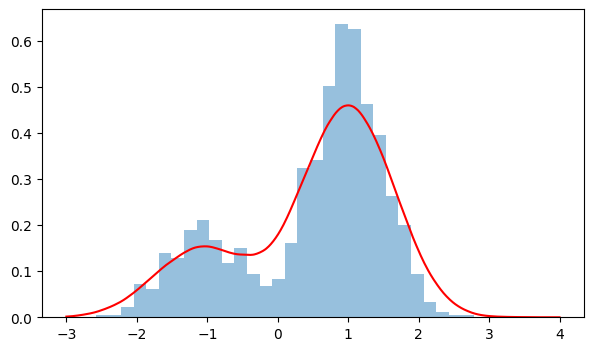

In [97]:
n = 1000
np.random.seed(123)
muestra_1 = np.random.normal(loc=1, scale=0.5, size=int(n * 0.75))
muestra_2 = np.random.normal(loc=-1, scale=0.5, size=int(n * 0.25))
datos = np.hstack((muestra_1, muestra_2))

X_grid = np.linspace(-3, 4, 1000)

modelo_kde = KernelDensity(kernel="linear", bandwidth=1)
modelo_kde.fit(datos.reshape(-1, 1))

log_densidad_pred = modelo_kde.score_samples(X_grid.reshape((-1, 1)))
# Se aplica el exponente para deshacer el logaritmo
densidad_pred = np.exp(log_densidad_pred)

fig, ax = plt.subplots(figsize=(7, 4))
ax.hist(datos, bins=30, density=True, color="#3182bd", alpha=0.5)
ax.plot(X_grid, densidad_pred, color="red", label="predicción")

<AxesSubplot:title={'center':'Personas embarcadas por puerto del Titanic'}, xlabel='embarked'>

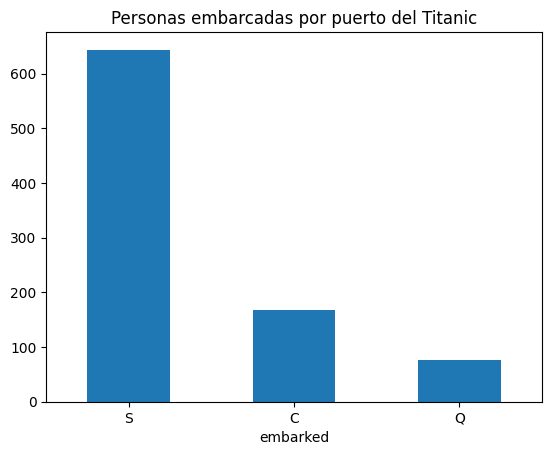

In [107]:
import seaborn as sns

titanic_df = sns.load_dataset("titanic")
titanic_df["embarked"].value_counts().plot(
    kind="bar", rot=0, title="Personas embarcadas por puerto del Titanic"
)

In [113]:
titanic_df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

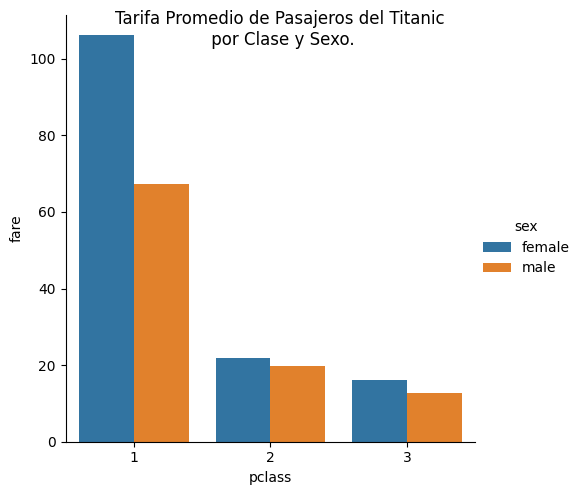

In [127]:
g = sns.catplot(
    data=titanic_df, y="fare", x="pclass", kind="bar", errorbar=None, hue="sex"
)
g.figure.suptitle("Tarifa Promedio de Pasajeros del Titanic\n por Clase y Sexo.")

In [138]:
data = titanic_df[["age", "fare"]].melt(value_vars=["age", "fare"])
data

,variable,value
0,age,22.00
1,age,38.00
2,age,26.00
3,age,35.00
4,age,35.00
...,...,...
1777,fare,13.00
1778,fare,30.00
1779,fare,23.45
1780,fare,30.00


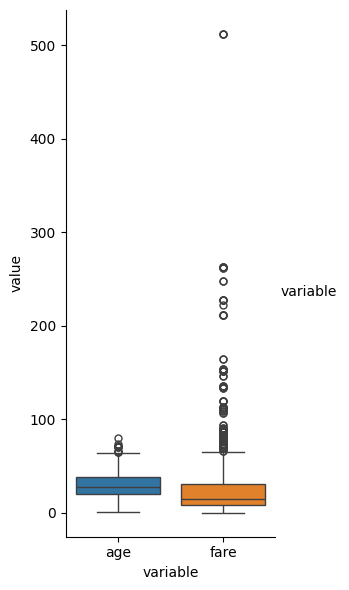

In [142]:
sns.catplot(
    kind="box", x="variable", y="value", data=data, height=6, aspect=0.5, hue="variable"
)

In [143]:
iris_df = sns.load_dataset("iris")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [148]:
data = iris_df.melt(
    value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"]
)
data

,variable,value
0,sepal_length,5.1
1,sepal_length,4.9
2,sepal_length,4.7
3,sepal_length,4.6
4,sepal_length,5.0
...,...,...
595,petal_width,2.3
596,petal_width,1.9
597,petal_width,2.0
598,petal_width,2.3


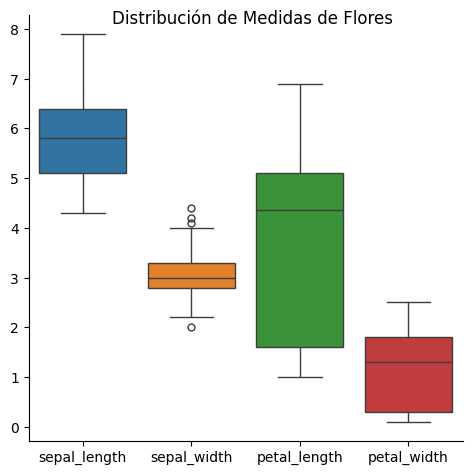

In [152]:
g = sns.catplot(x="variable", y="value", kind="box", hue="variable", data=data)
g.figure.suptitle("Distribución de Medidas de Flores")
g._legend.remove()
g.set(xlabel=None)
g.set(ylabel=None)

Text(0, 0.5, 'Largo del Pétalo')

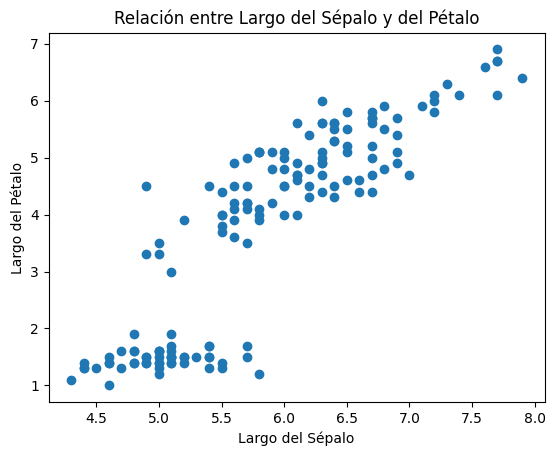

In [161]:
plt.scatter(iris_df.sepal_length, iris_df.petal_length)
plt.title("Relación entre Largo del Sépalo y del Pétalo")
plt.xlabel("Largo del Sépalo")
plt.ylabel("Largo del Pétalo")

Text(0.5, 0.98, 'Cuarteto de Anscombe')

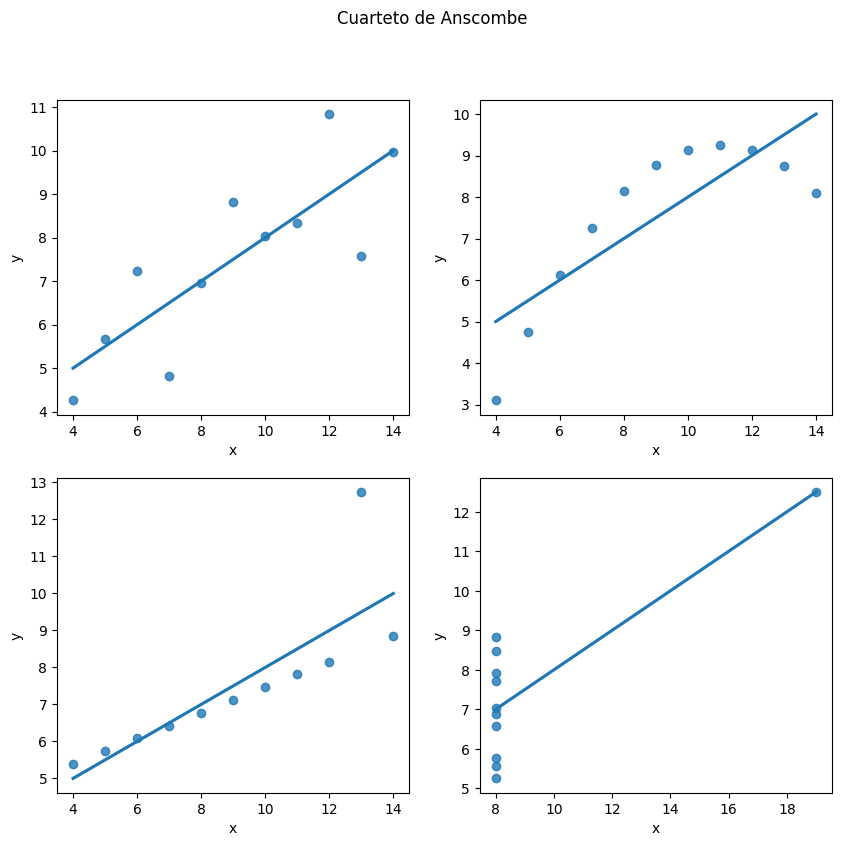

In [172]:
anscombe = sns.load_dataset("anscombe")

fig = plt.figure(figsize=(10, 9))
ax = fig.subplot_mosaic(
    """AB
                        CD"""
)
sns.regplot(data=anscombe.query("dataset == 'I'"), x="x", y="y", ax=ax["A"], ci=None)
sns.regplot(data=anscombe.query("dataset == 'II'"), x="x", y="y", ax=ax["B"], ci=None)
sns.regplot(data=anscombe.query("dataset == 'III'"), x="x", y="y", ax=ax["C"], ci=None)
sns.regplot(data=anscombe.query("dataset == 'IV'"), x="x", y="y", ax=ax["D"], ci=None)
plt.suptitle("Cuarteto de Anscombe")

In [1]:
import seaborn as sns

iris_df = sns.load_dataset("iris")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


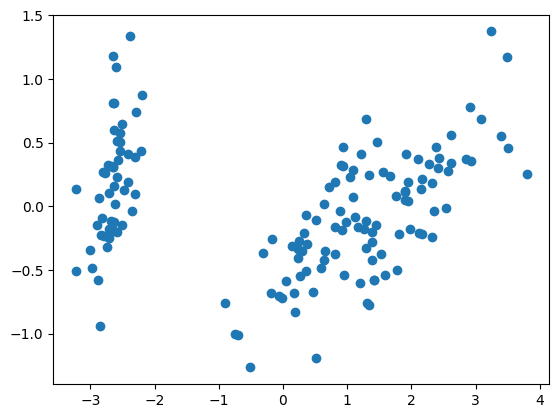

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
data = pca.fit_transform(iris_df.drop(columns="species"))
x, y = data[:,0], data[:,1]

plt.scatter(x, y);

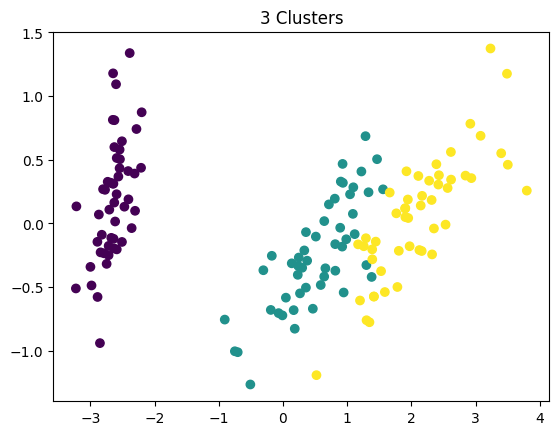

In [10]:
c = iris_df.species.astype("category").cat.codes
plt.scatter(x,y, c = c)
plt.title("3 Clusters");

Text(0.5, 1.0, '2 Clusters')

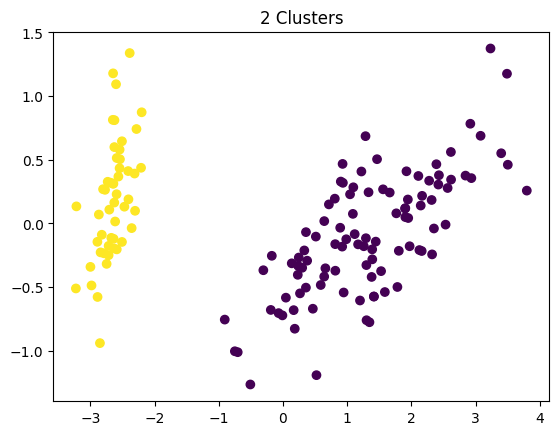

In [9]:
c_prima = (c == 0).astype("int64")
plt.scatter(x,y, c= c_prima)
plt.title("2 Clusters")